<a href="https://colab.research.google.com/github/Nikhilsuresh11/Wine-quality-analysis-and-EDA/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# **Loading the dataset**

In [ ]:
df=pd.read_csv('/content/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# statistical info
df.describe()

In [ ]:
# datatype info
df.info()

# **Preprocessing the dataset**

In [ ]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Exploratory Data Analysis**

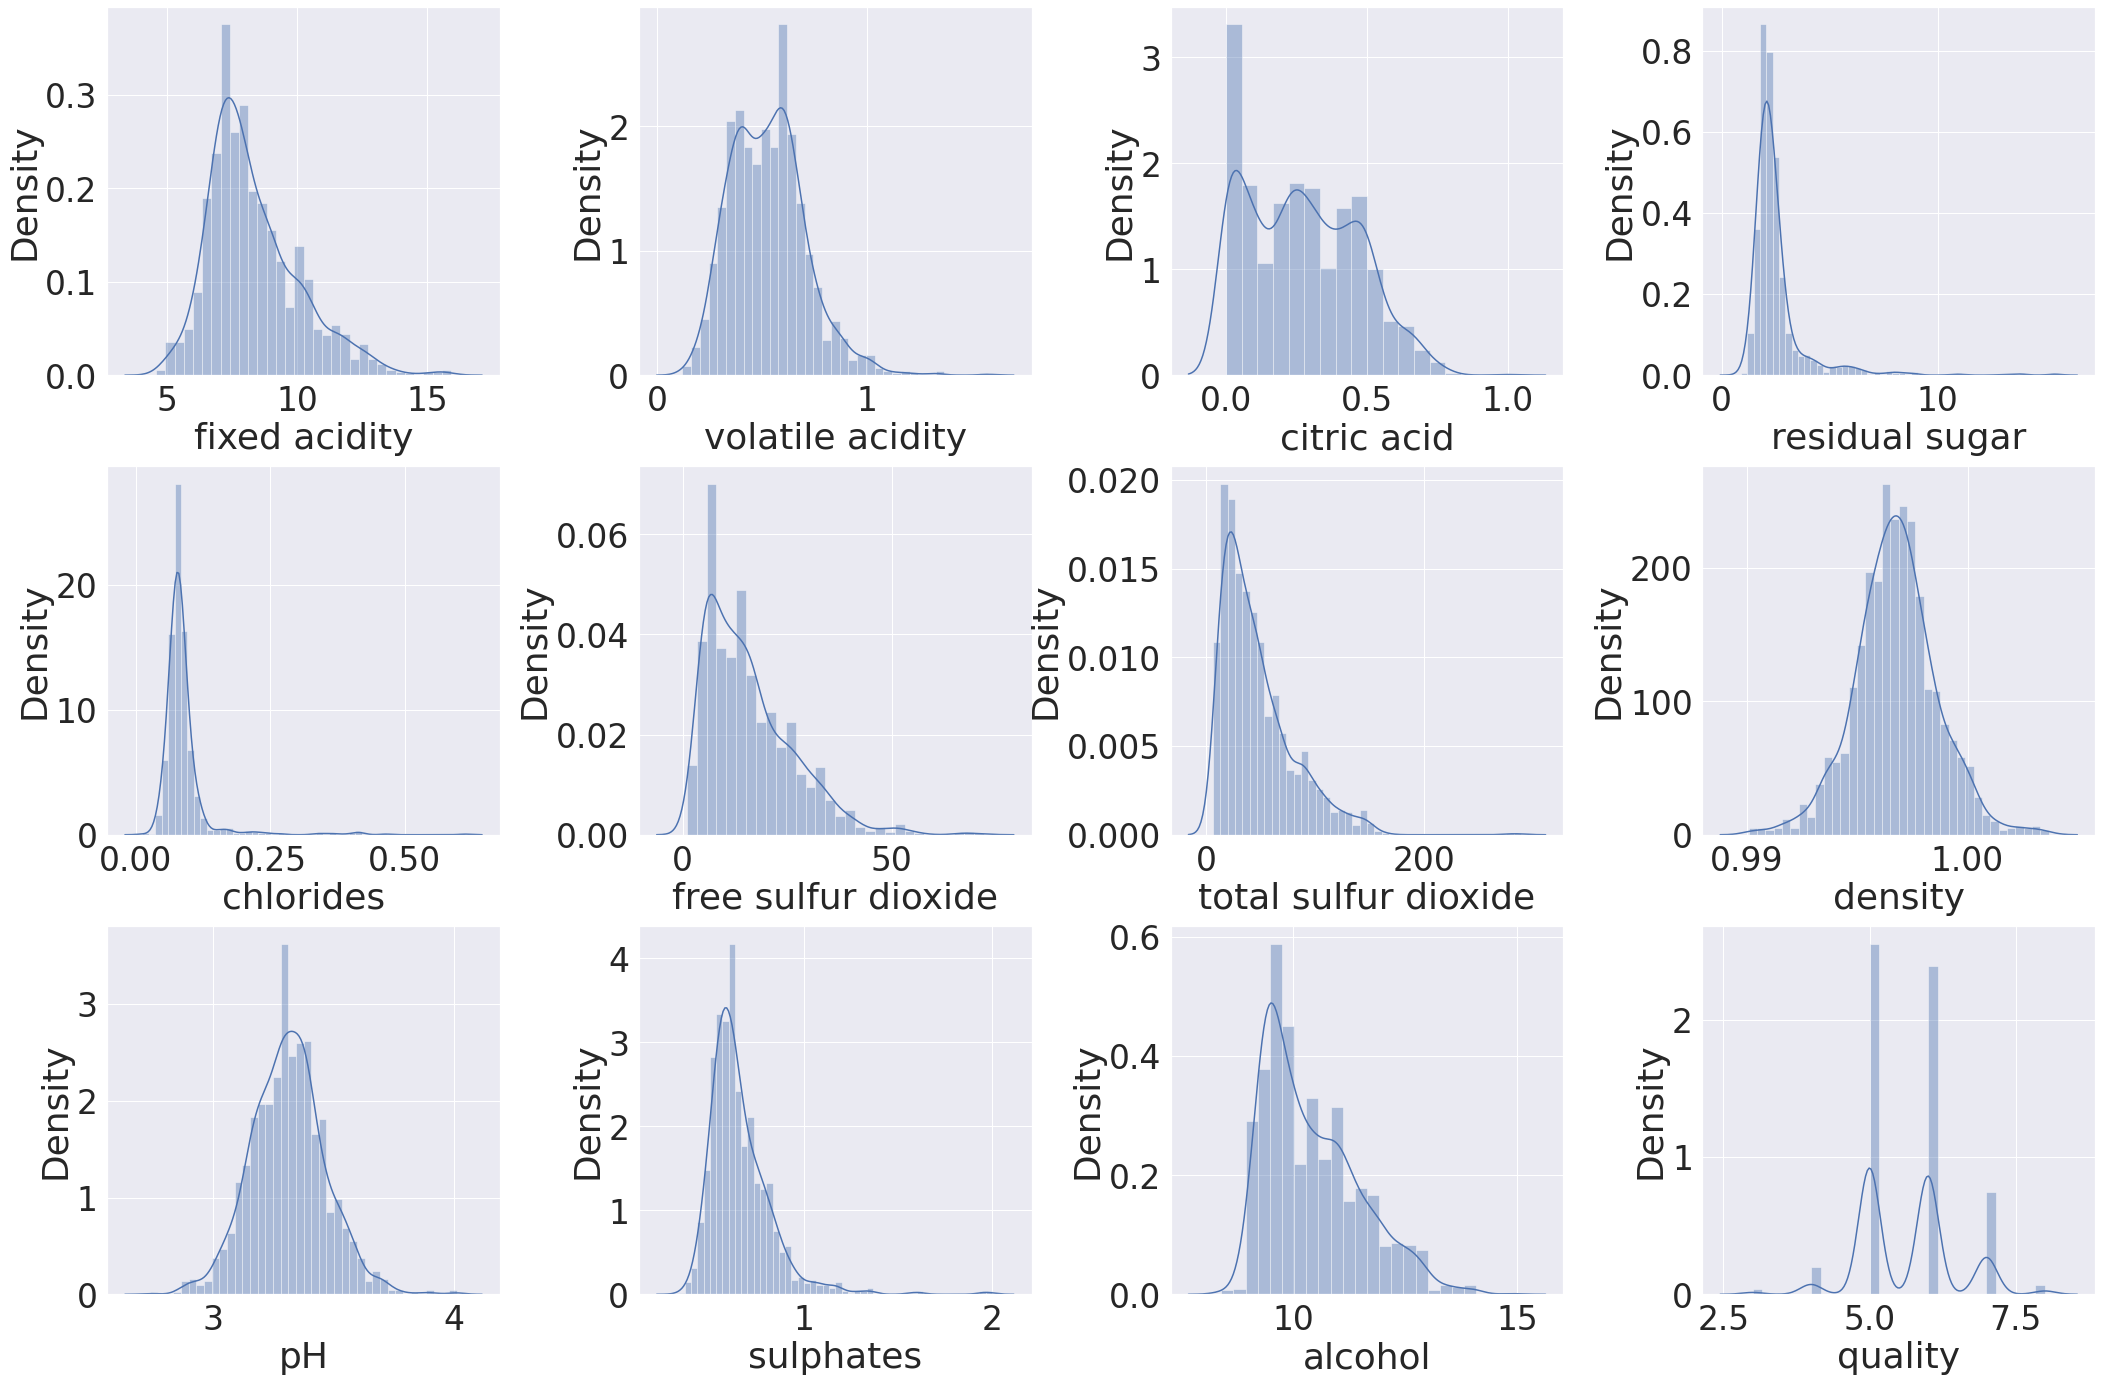

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(30,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0.2)

In [ ]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

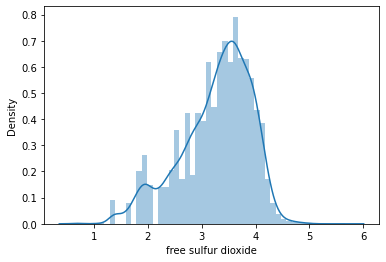

In [ ]:
sns.distplot(df['free sulfur dioxide'])

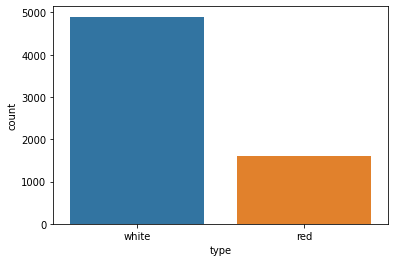

In [ ]:
sns.countplot(df['type'])

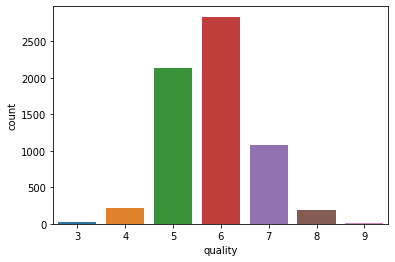

In [ ]:
sns.countplot(df['quality'])

## **Normality test** 

In [ ]:
#Data Import
import pandas as pd
WineData = pd.read_csv("/content/winequality-red.csv")

In [ ]:
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


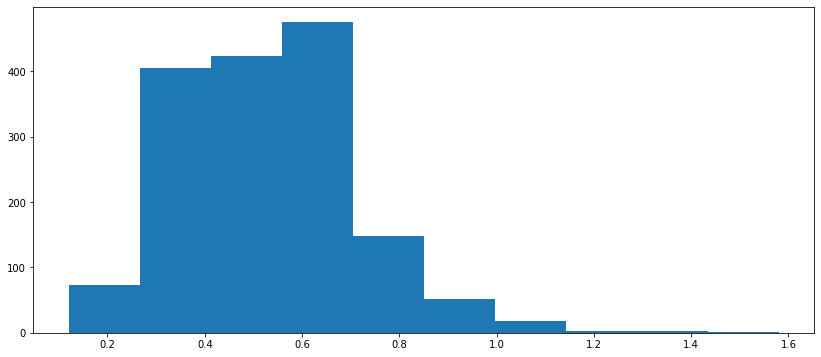

In [ ]:
#Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(WineData['volatile acidity'])
pyplot.show()

In [ ]:
#Help from Python
from scipy.stats import shapiro

DataToTest = WineData['volatile acidity']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.97, p=0.000000000000000268680677283857
Not a normal distribution


# Normality test using K^2 Normality Test Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [ ]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = WineData['volatile acidity']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

stat=143.4193435598, p=0.0000000000
Not Normllay distributed


# **Coorelation Matrix**

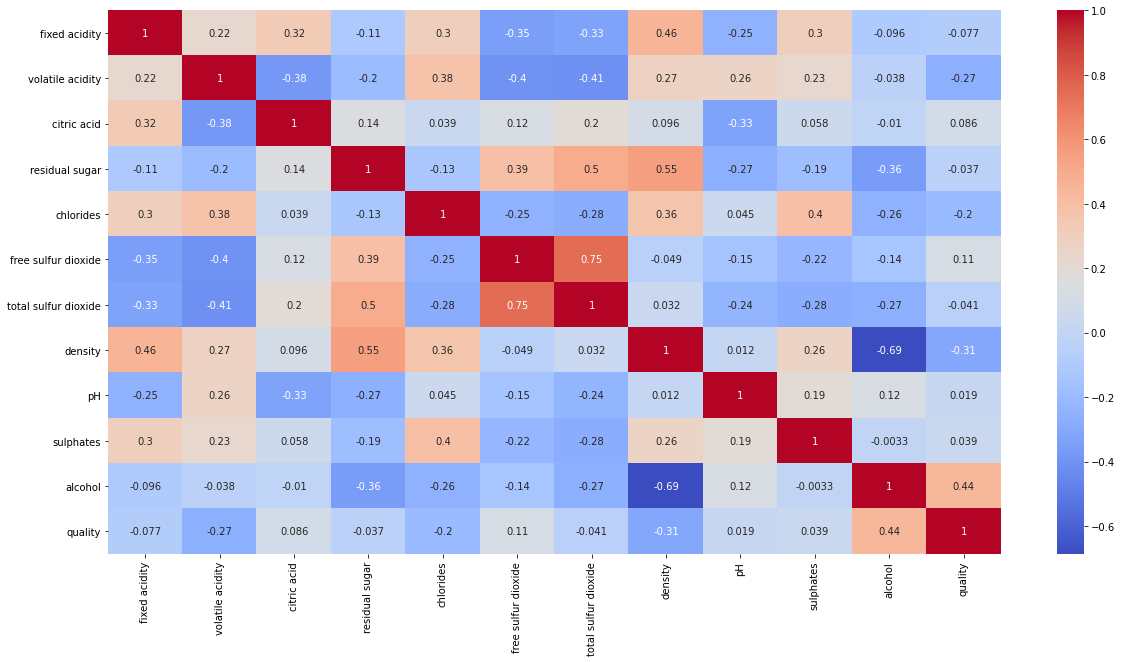

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

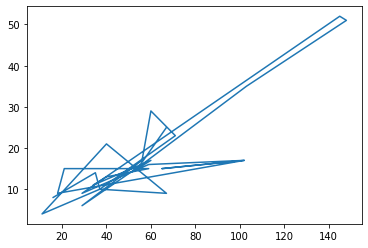

In [ ]:
FirstSample = WineData[1:30]['total sulfur dioxide']
SecondSample = WineData[1:30]['free sulfur dioxide']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [ ]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%.25f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.805, p=0.0000001394891475497492542
dependent samples


In [ ]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%.25f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.855, p=0.0000000036549502875056885
dependent samples


In [ ]:
WineData[1:30].corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.325296,0.553331,0.064789,0.145997,0.369643,0.351803,0.558823,-0.554355,0.176146,-0.014915,0.232732
volatile acidity,-0.325296,1.000000,-0.808892,0.086848,-0.086997,-0.046489,-0.045020,-0.018832,0.176232,-0.058765,-0.116946,-0.323907
citric acid,0.553331,-0.808892,1.000000,0.163451,0.302150,0.273691,0.356156,0.321183,-0.402765,0.404090,0.247358,0.246825
residual sugar,0.064789,0.086848,0.163451,1.000000,-0.069497,0.278564,0.580704,0.524667,-0.011351,0.074962,0.358012,-0.324054
chlorides,0.145997,-0.086997,0.302150,-0.069497,1.000000,0.226563,0.211043,0.118830,-0.601472,0.644596,-0.342212,-0.037891
free sulfur dioxide,0.369643,-0.046489,0.273691,0.278564,0.226563,1.000000,0.854553,0.430067,-0.204240,0.156305,0.056671,0.120759
total sulfur dioxide,0.351803,-0.045020,0.356156,0.580704,0.211043,0.854553,1.000000,0.523186,-0.280118,0.210051,0.229037,-0.112902
density,0.558823,-0.018832,0.321183,0.524667,0.118830,0.430067,0.523186,1.000000,-0.181546,0.300643,-0.089917,-0.249689
pH,-0.554355,0.176232,-0.402765,-0.011351,-0.601472,-0.204240,-0.280118,-0.181546,1.000000,-0.539957,0.232744,0.007259
sulphates,0.176146,-0.058765,0.404090,0.074962,0.644596,0.156305,0.210051,0.300643,-0.539957,1.000000,-0.172364,-0.120335


#*Comparison*

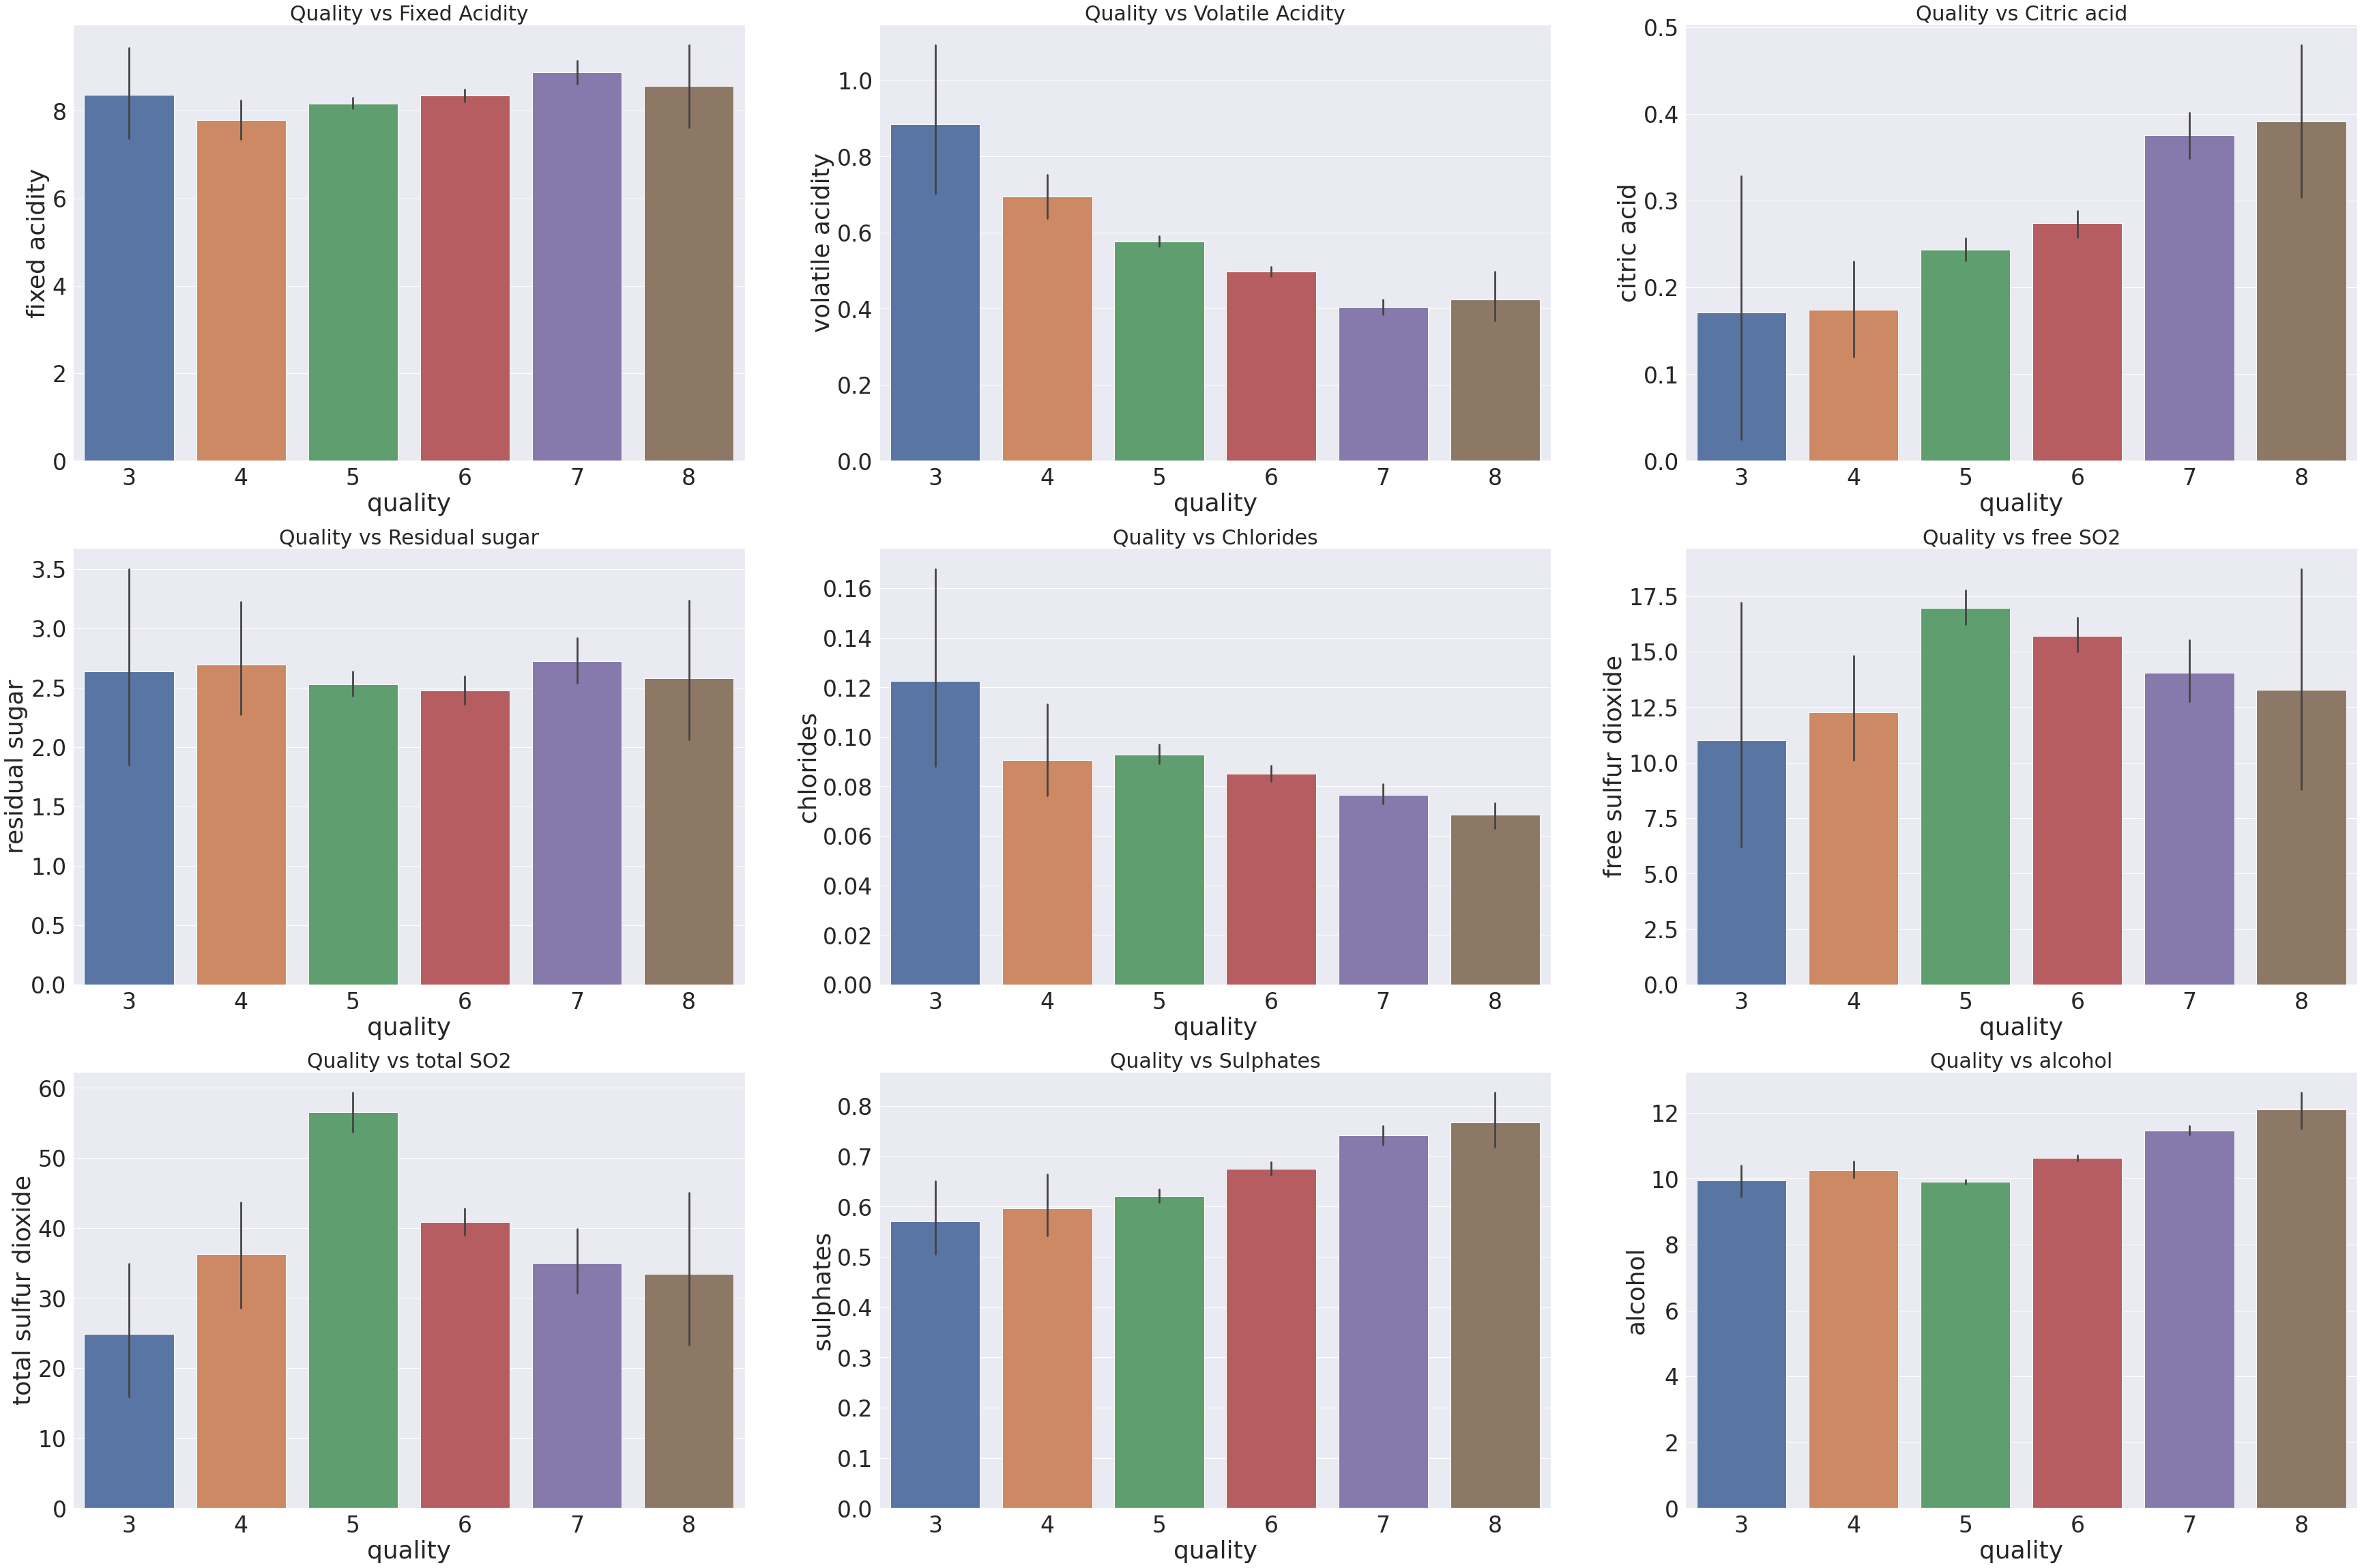

In [ ]:
plt.figure(figsize=(60,40))
sns.set(font_scale=3)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=30)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=30)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=30)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=30)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=30)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=30)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=30)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=30)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=30)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

# **The overall quality maintained by Wine brands is given below**

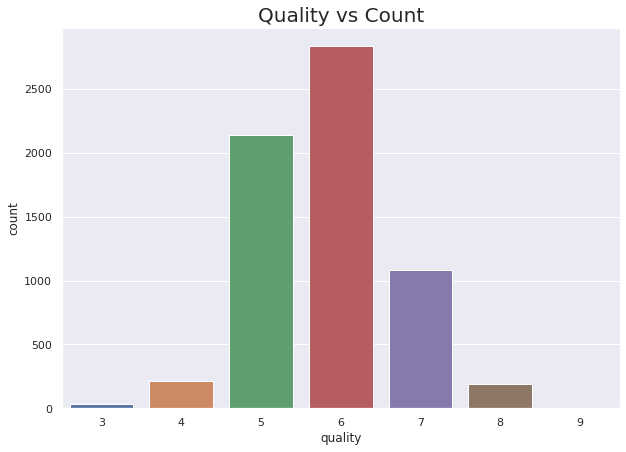

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1)
plt.title("Quality vs Count",fontsize=20)
sns.countplot(df['quality'])

## Conclusion

The Average quality maintained by Wine producing companies are rated to 6 out of 10. The worst quality is 3 out of 10. The alcohol, citric acid and fixed acidity influences the quality of the Wine.